In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, special

In [2]:
import arviz as az
def hdi(samples, prob=0.95):
    lo, hi = az.hdi(np.asarray(samples), hdi_prob=prob)
    return float(lo), float(hi)

In [3]:
plt.rcParams.update({
    "figure.figsize": (7.0, 4.2),
    "axes.grid": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titleweight": "bold",
    "axes.labelweight": "regular",
})

rng = np.random.default_rng(42)

# 1) MCI Duration - Exponential(mean = 3.85 years)

`MCI_AVG_DURATION = 3.85`

https://github.com/ihmeuw/vivarium_csu_alzheimers/blob/main/src/vivarium_csu_alzheimers/constants/data_values.py#L51


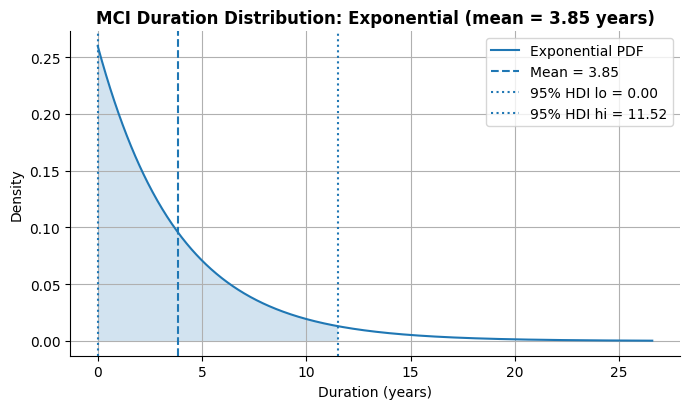

In [4]:
exp_mean = 3.85
exp_scale = exp_mean  # SciPy's exponential uses 'scale' = 1/lambda = mean
exp_dist = stats.expon(scale=exp_scale)

# Grid (up to ~99.9th percentile)
x_exp = np.linspace(0, exp_dist.ppf(0.999), 800)
pdf_exp = exp_dist.pdf(x_exp)

# Samples for HDI
samp_exp = exp_dist.rvs(size=200_000, random_state=rng)
hdi_lo_exp, hdi_hi_exp = hdi(samp_exp, prob=0.95)

fig1 = plt.figure()
plt.plot(x_exp, pdf_exp, label="Exponential PDF")
# Mean
plt.axvline(exp_dist.mean(), linestyle="--", linewidth=1.5, label=f"Mean = {exp_dist.mean():.2f}")
# 95% HDI
plt.axvline(hdi_lo_exp, linestyle=":", linewidth=1.5, label=f"95% HDI lo = {hdi_lo_exp:.2f}")
plt.axvline(hdi_hi_exp, linestyle=":", linewidth=1.5, label=f"95% HDI hi = {hdi_hi_exp:.2f}")
# Shade HDI band under curve for visual emphasis
mask = (x_exp >= hdi_lo_exp) & (x_exp <= hdi_hi_exp)
plt.fill_between(x_exp[mask], pdf_exp[mask], alpha=0.2, step="pre")
plt.title(f"MCI Duration Distribution: Exponential (mean = {exp_mean} years)")
plt.xlabel("Duration (years)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()


# 2) BBBM Duration ~ Weibull(shape k, scale s)

https://github.com/ihmeuw/vivarium_csu_alzheimers/blob/main/src/vivarium_csu_alzheimers/constants/data_values.py#L46-L47

```
WEIBULL_SHAPE = 1.22
WEIBULL_SCALE = 6.76
```


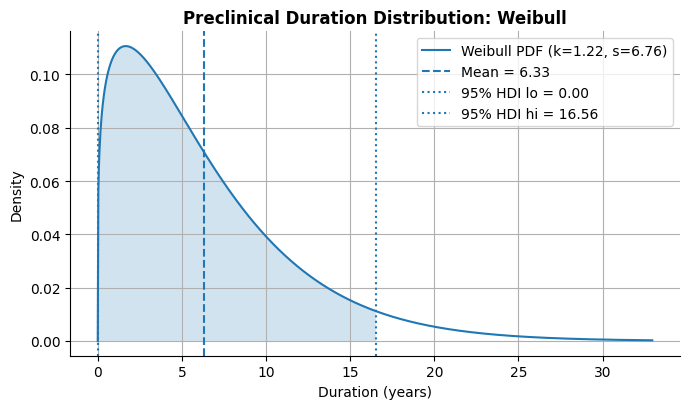

In [5]:
# SciPy parameterization: weibull_min(c=k, scale=s)
k = 1.22
s = 6.76


weibull = stats.weibull_min(c=k, scale=s)

x_w = np.linspace(0, weibull.ppf(0.999), 1000)
pdf_w = weibull.pdf(x_w)

samp_w = weibull.rvs(size=200_000, random_state=rng)
hdi_lo_w, hdi_hi_w = hdi(samp_w, prob=0.95)

fig2 = plt.figure()
plt.plot(x_w, pdf_w, label=f"Weibull PDF (k={k:.2f}, s={s:.2f})")
plt.axvline(weibull.mean(), linestyle="--", linewidth=1.5, label=f"Mean = {weibull.mean():.2f}")
plt.axvline(hdi_lo_w, linestyle=":", linewidth=1.5, label=f"95% HDI lo = {hdi_lo_w:.2f}")
plt.axvline(hdi_hi_w, linestyle=":", linewidth=1.5, label=f"95% HDI hi = {hdi_hi_w:.2f}")
mask_w = (x_w >= hdi_lo_w) & (x_w <= hdi_hi_w)
plt.fill_between(x_w[mask_w], pdf_w[mask_w], alpha=0.2, step="pre")
plt.title("Preclinical Duration Distribution: Weibull")
plt.xlabel("Duration (years)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()